In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
twitter_data = pd.read_csv('../raw_data/twitter_data.csv', encoding='latin1')


In [3]:
twitter_data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
len(twitter_data)

1599999

In [5]:
column_renaming = {
    "0": "Target",
    "1467810369": "Id",
    "Mon Apr 06 22:19:45 PDT 2009": "Time_Tweet",
    "NO_QUERY": "NO_QUERY",
    "_TheSpecialOne_": "User",
    """@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D""": "Tweet"
}

twitter_data.rename(columns=column_renaming, inplace=True)

In [6]:
twitter_data = twitter_data[0:60000]
len(twitter_data)

60000

In [7]:
twitter_data.columns

Index(['Target', 'Id', 'Time_Tweet', 'NO_QUERY', 'User', 'Tweet'], dtype='object')

In [8]:
twitter_data.isnull().sum()

Target        0
Id            0
Time_Tweet    0
NO_QUERY      0
User          0
Tweet         0
dtype: int64

In [9]:
lenght_words = []
for index in twitter_data['Tweet']:
    lenght = len(index)
    lenght_words.append(lenght)
    
lenght_words   

[111,
 89,
 47,
 111,
 29,
 11,
 99,
 36,
 25,
 43,
 26,
 94,
 77,
 117,
 103,
 93,
 20,
 64,
 79,
 62,
 101,
 48,
 38,
 26,
 46,
 65,
 22,
 89,
 81,
 60,
 131,
 131,
 56,
 49,
 127,
 101,
 61,
 106,
 113,
 95,
 99,
 89,
 101,
 110,
 95,
 138,
 75,
 51,
 67,
 129,
 131,
 56,
 93,
 13,
 135,
 38,
 135,
 27,
 110,
 102,
 38,
 34,
 102,
 65,
 98,
 29,
 73,
 39,
 61,
 136,
 110,
 67,
 138,
 59,
 39,
 137,
 24,
 37,
 97,
 73,
 115,
 16,
 27,
 57,
 108,
 47,
 116,
 32,
 112,
 115,
 43,
 25,
 134,
 138,
 85,
 112,
 81,
 55,
 94,
 133,
 125,
 30,
 27,
 65,
 118,
 133,
 112,
 28,
 110,
 30,
 59,
 76,
 119,
 27,
 136,
 52,
 29,
 47,
 129,
 58,
 44,
 104,
 77,
 122,
 64,
 137,
 126,
 12,
 77,
 118,
 38,
 132,
 15,
 137,
 14,
 20,
 127,
 87,
 43,
 23,
 41,
 47,
 132,
 48,
 133,
 22,
 89,
 49,
 137,
 29,
 37,
 49,
 42,
 126,
 17,
 63,
 34,
 44,
 131,
 136,
 30,
 24,
 92,
 72,
 103,
 30,
 72,
 28,
 92,
 49,
 20,
 99,
 79,
 43,
 80,
 61,
 102,
 70,
 81,
 127,
 55,
 21,
 119,
 120,
 48,
 81,
 53,
 128

In [10]:
def get_length(X):
    for index in range(len(twitter_data['Tweet'])):
        lenght = len(index)
    return lenght

In [11]:
twitter_data['Length'] = twitter_data['Tweet'].str.len()

In [12]:
twitter_data

,Target,Id,Time_Tweet,NO_QUERY,User,Tweet,Length
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,29
...,...,...,...,...,...,...,...
59995,0,1686279629,Sun May 03 04:41:35 PDT 2009,NO_QUERY,ppatel662,is going shopping today. Has no professional c...,114
59996,0,1686279857,Sun May 03 04:41:39 PDT 2009,NO_QUERY,joincidence,@vickyclare85 But if you get swine flu then I ...,95
59997,0,1686279927,Sun May 03 04:41:40 PDT 2009,NO_QUERY,calezg91,I'm not in the mood of studing!!!!!!!!! but i ...,54
59998,0,1686279952,Sun May 03 04:41:41 PDT 2009,NO_QUERY,MarielleLoreto,I'm breaking out.,18


In [13]:
max(lenght_words)

186

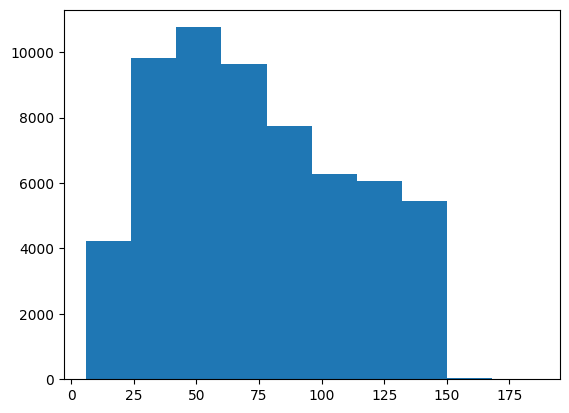

In [14]:
plt.hist(lenght_words);

In [15]:
twitter_data[twitter_data['Length'] > 150].head()

,Target,Id,Time_Tweet,NO_QUERY,User,Tweet,Length
1766,0,1468228123,Tue Apr 07 00:25:08 PDT 2009,NO_QUERY,Rainuryn,tks pa 4 &quot;tapauing&quot; croissant tuna k...,152
3433,0,1468595095,Tue Apr 07 02:37:20 PDT 2009,NO_QUERY,cwkong2,@danielhcwong Taylor 814ce --&gt; #&amp;$(#&am...,157
6893,0,1469609172,Tue Apr 07 06:53:41 PDT 2009,NO_QUERY,aaronrodgers,Woke up early this morning to &quot;not all th...,158
13537,0,1553297679,Sat Apr 18 13:53:35 PDT 2009,NO_QUERY,theresa001,Took niece &amp; nephew to Blockbuster- rented...,167
16808,0,1556059972,Sat Apr 18 21:31:01 PDT 2009,NO_QUERY,vestybaby,@SongzYuuup wat is the name of ur mixtape with...,161


In [16]:
twitter_data['Tweet'][13537]

'Took niece &amp; nephew to Blockbuster- rented &quot;Marley&amp;me&quot;, &amp; &quot;Slumdog Millionaire&quot; Niece kiki799 reinjured ankle @ last night b-ball game '

# DATA CLEANING

In [17]:
twitter_data['Target'].unique()

array([0])

In [18]:
twitter_data[['Target']].value_counts(normalize=True)

Target
0         1.0
Name: proportion, dtype: float64

In [19]:
#Function to Clean Tweet Text

stop_words = set(stopwords.words('english')) # you can also choose other languages

stop_words

NameError: name 'stopwords' is not defined

In [20]:
string.punctuation

NameError: name 'string' is not defined

In [21]:
import re
import string
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from textblob import TextBlob


def preprocessing(sentence):
    
    #correct grammar
    blob = TextBlob(sentence)
    sentence = str(blob.correct())
        
    #remove white spaces
    sentence = sentence.strip()
    
    #lower the characters
    sentence = sentence.lower()
    
    #remove unique characters
    sentence = sentence.replace('½', 'half')
    
    #remove numbers
    sentence = re.sub(r'\b\d+\b', '', sentence)
    
    #remove emails
    email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
    sentence = re.sub(email_pattern, '', sentence)
    
    #remove twitter handles
    handle_pattern = r'@\w+'
    sentence = re.sub(handle_pattern, '', sentence)
    
    #remove twitter emoticons
    emoticon_pattern = r'[:;=8][\-o\*\']?[\)\]\(\[dDpP/:}{@|\\]'
    sentence = re.sub(emoticon_pattern, '', sentence)
    
    #remove websites
    url_pattern = r'https?://\S+|www\.\S+'
    sentence = re.sub(url_pattern, '', sentence)
    
    #tokenize sentence 
    tokens = word_tokenize(sentence)
    
    #remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Remove punctuation
    filtered_tokens = [word for word in filtered_tokens if word not in string.punctuation]
    
    #repeated characters
    pattern = re.compile(r"(.)\1{2,}")
    filtered_tokens = [re.sub(r"(.)\1{2,}", r"\1", word) for word in filtered_tokens]
    
    #lemmatize the tokens
    wnl = WordNetLemmatizer()
    #iterate with lemmatizer for verbs
    verb_lemmatize_words = [wnl.lemmatize(word, pos = "v") for word in filtered_tokens]
    #iterate with lemmatizer for nouns
    noun_lemmatize_words = [wnl.lemmatize(word, pos = "n") for word in verb_lemmatize_words]
    
    #join tokens
    sentence = ' '.join(noun_lemmatize_words)
    return sentence

In [ ]:
twitter_data['clean_text'] = twitter_data['Tweet'].apply(preprocessing)
twitter_data

# LDA MODEL

In [22]:
cleaned_text = twitter_data['Tweet'].apply(preprocessing)
cleaned_text

KeyboardInterrupt: 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import sys

vectorizer = TfidfVectorizer()
vectorized_clean_text = vectorizer.fit_transform(cleaned_text)
vectorized_clean_text = pd.DataFrame(
    vectorized_clean_text.toarray(),
    columns=vectorizer.get_feature_names_out()
)

np.set_printoptions(threshold=sys.maxsize)
vectorizer.get_feature_names_out()

In [ ]:
len(vectorizer.get_feature_names_out())

In [ ]:
uninformed

In [ ]:
    wnl = WordNetLemmatizer()


In [ ]:
noun_lemmatize_words = wnl.lemmatize('uninformed', pos = "n")
noun_lemmatize_words

In [ ]:
!pip install spellchecker


In [ ]:
!pip install textblob